## About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/).




This dataset contains observations of weather metrics for each day from 1st December 2008 to 25 March 2023. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [1]:
# ! pip install pip install imbalanced-learn

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    jaccard_score, f1_score, log_loss, confusion_matrix,
    accuracy_score, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.under_sampling import NearMiss

## Importing the Dataset


In [3]:
dataset ='https://raw.githubusercontent.com/samuelrahmatuel/AU-BOM-Daily-Weather-Observations/main/weatherAUS.csv'
df = pd.read_csv(dataset)
print(df.shape)
df.info()

(226868, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226868 entries, 0 to 226867
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           226868 non-null  object 
 1   Location       226868 non-null  object 
 2   MinTemp        223068 non-null  float64
 3   MaxTemp        223238 non-null  float64
 4   Rainfall       220093 non-null  float64
 5   Evaporation    103612 non-null  float64
 6   Sunshine       94231 non-null   float64
 7   WindGustDir    209959 non-null  object 
 8   WindGustSpeed  210068 non-null  float64
 9   WindDir9am     209309 non-null  object 
 10  WindDir3pm     217154 non-null  object 
 11  WindSpeed9am   222435 non-null  float64
 12  WindSpeed3pm   218678 non-null  float64
 13  Humidity9am    221584 non-null  float64
 14  Humidity3pm    217333 non-null  float64
 15  Pressure9am    201792 non-null  float64
 16  Pressure3pm    201813 non-null  float64
 17  Cloud9am       1

In [5]:
df.shape

(226868, 24)

In [6]:
# convert Date column to date type, Creating a collumn of year & month
df['date']= pd.to_datetime(df["Date"])
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,date,year,month,day
61504,2010-08-18,Williamtown,1.3,21.5,0.0,3.0,9.8,NE,28.0,WNW,...,2.0,11.7,20.9,No,0.8,No,2010-08-18,2010,8,18


In [8]:
def statMissingValue(X):
    lstSummary = []
    for col in X.columns:
        liTotal = len(X.index)
        liMissing = X[col].isna().sum()
        lfMissingRate = round(liMissing * 100/liTotal,2)
        liZero = 0
        liNUnique = X[col].nunique()
        if(X[col].dtype!='object'):
            liZero = X[col].isin([0]).sum()
        lfZeroRate = round(liZero*100/liTotal,2)
        lstSummary.append([col,str(X[col].dtype),liTotal, liNUnique, liMissing, lfMissingRate,liZero,lfZeroRate])
    return pd.DataFrame(lstSummary,columns=['feature','col_type','total', 'unique', 'na','na_rate','zero','zero_rate'])

statMissingValue(df)

,feature,col_type,total,unique,na,na_rate,zero,zero_rate
0,Date,object,226868,5136,0,0.00,0,0.00
1,Location,object,226868,49,0,0.00,0,0.00
2,MinTemp,float64,226868,401,3800,1.67,246,0.11
3,MaxTemp,float64,226868,516,3630,1.60,25,0.01
4,Rainfall,float64,226868,776,6775,2.99,141400,62.33
5,Evaporation,float64,226868,392,123256,54.33,387,0.17
6,Sunshine,float64,226868,146,132637,58.46,2873,1.27
7,WindGustDir,object,226868,16,16909,7.45,0,0.00
8,WindGustSpeed,float64,226868,73,16800,7.41,0,0.00
9,WindDir9am,object,226868,16,17559,7.74,0,0.00


In [9]:
# Identified columns with high percentages of missing values to drop
columns_to_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df.drop(columns=columns_to_drop, inplace=True)

# Drop all missing values
df = df.dropna()

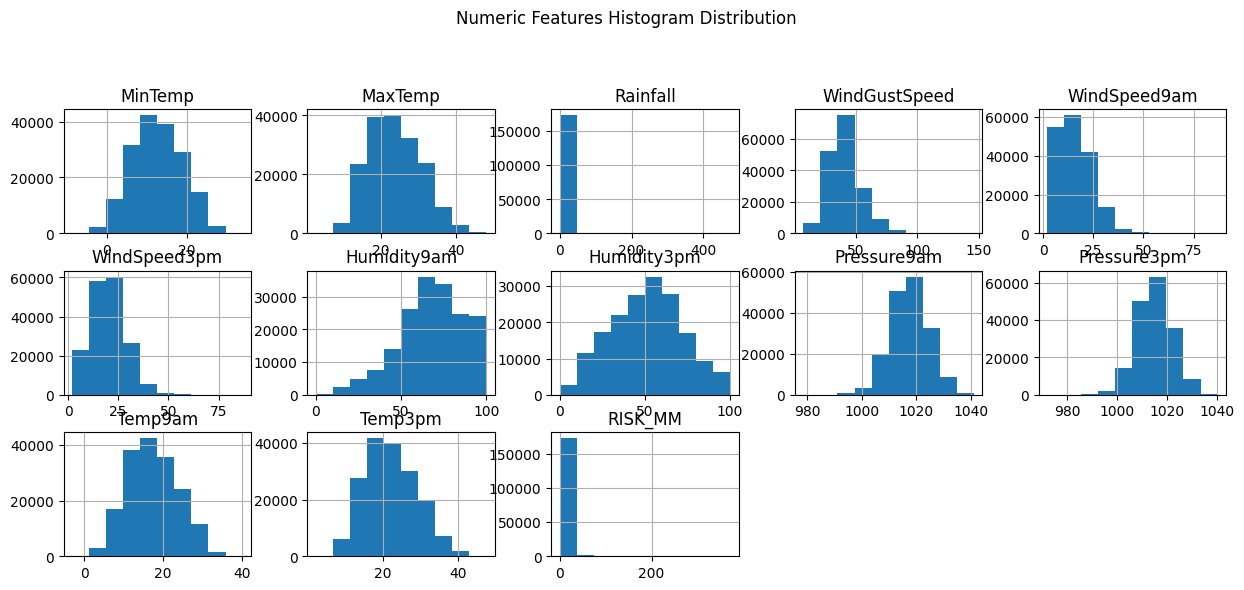

In [10]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[num_columns].hist(bins=10, figsize=(15, 10), layout=(5, 5))
plt.suptitle('Numeric Features Histogram Distribution')
plt.show()

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_categorical = df[categorical_cols]
df_categorical.isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [12]:
# Drop Old Date Column
df_categorical.drop(columns=['Date'], inplace=True)

In [13]:
numerical_cols = df.select_dtypes(include=['float64']).columns
df_numerical = df[numerical_cols]
df_numerical.sample(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
142169,14.5,24.3,0.0,26.0,9.0,17.0,38.0,47.0,1018.8,1014.1,22.3,23.3,0.0
225110,0.7,22.3,0.0,30.0,13.0,13.0,31.0,13.0,1024.0,1020.9,10.2,21.4,0.0
152875,23.1,33.6,0.0,43.0,17.0,15.0,26.0,13.0,1017.6,1014.5,27.5,33.2,0.0
103686,8.4,17.9,22.8,61.0,22.0,31.0,69.0,67.0,1006.8,1009.5,13.4,16.2,0.6
217972,21.1,33.0,1.8,41.0,11.0,11.0,78.0,36.0,1015.5,1010.5,24.6,32.1,0.0


In [14]:
print(df_numerical.columns)
print(df_categorical.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [15]:
# Convert DataFrame column names to lowercase
df_categorical.columns = df_categorical.columns.str.lower()
df_numerical.columns = df_numerical.columns.str.lower()

In [16]:
df_kept = df.iloc[:, 20:24]

# oncatenate df_kept with df_numerical and df_categorical
df = pd.concat([df_kept, df_numerical, df_categorical], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174476 entries, 0 to 226867
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           174476 non-null  datetime64[ns]
 1   year           174476 non-null  int32         
 2   month          174476 non-null  int32         
 3   day            174476 non-null  int32         
 4   mintemp        174476 non-null  float64       
 5   maxtemp        174476 non-null  float64       
 6   rainfall       174476 non-null  float64       
 7   windgustspeed  174476 non-null  float64       
 8   windspeed9am   174476 non-null  float64       
 9   windspeed3pm   174476 non-null  float64       
 10  humidity9am    174476 non-null  float64       
 11  humidity3pm    174476 non-null  float64       
 12  pressure9am    174476 non-null  float64       
 13  pressure3pm    174476 non-null  float64       
 14  temp9am        174476 non-null  float64       
 15  temp3

In [18]:
df.isna().sum()

date             0
year             0
month            0
day              0
mintemp          0
maxtemp          0
rainfall         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
risk_mm          0
location         0
windgustdir      0
winddir9am       0
winddir3pm       0
raintoday        0
raintomorrow     0
dtype: int64

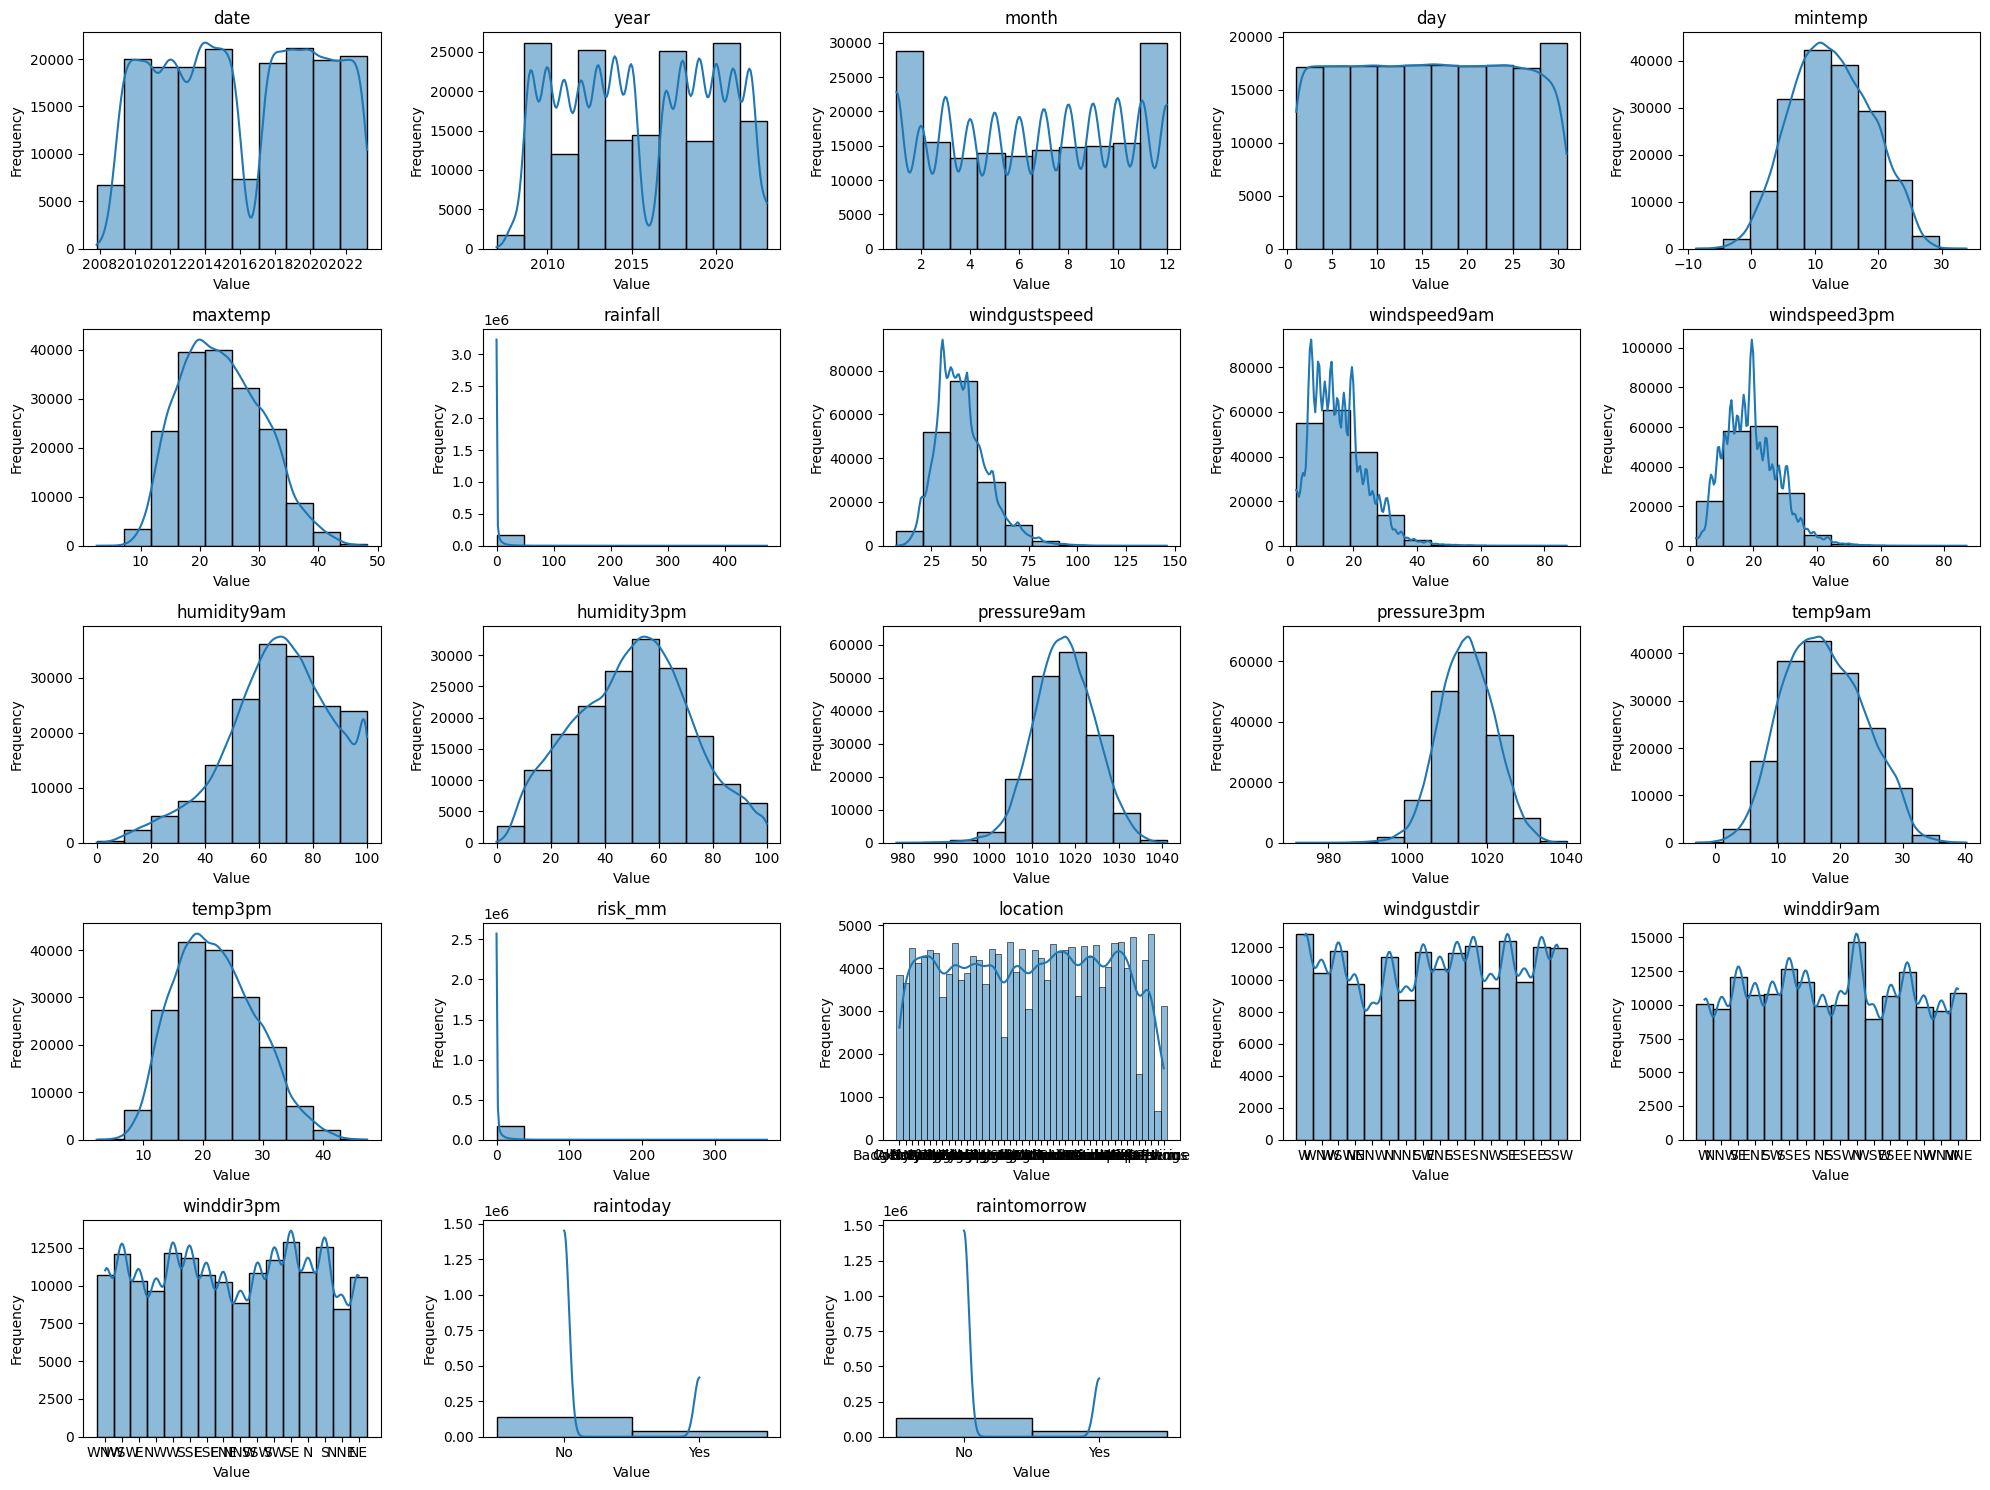

In [19]:
num_columns = len(df.columns)
nrows = num_columns // 5 + (1 if num_columns % 5 != 0 else 0)
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 3))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[i], bins=10, kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Rainfall per year')

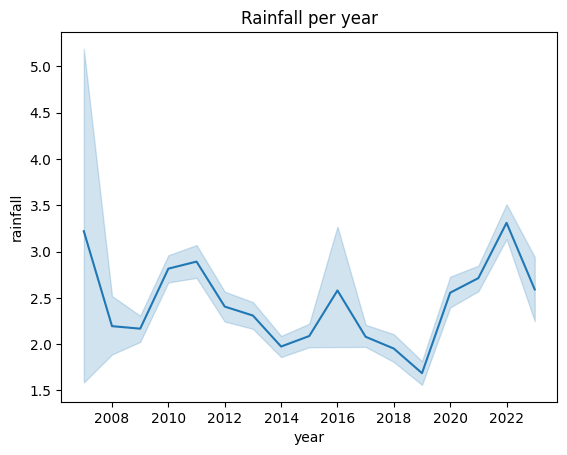

In [20]:
series = sns.lineplot(df , x='year', y='rainfall')
series.set_title('Rainfall per year')

Text(0.5, 1.0, 'Wind Speed average per year')

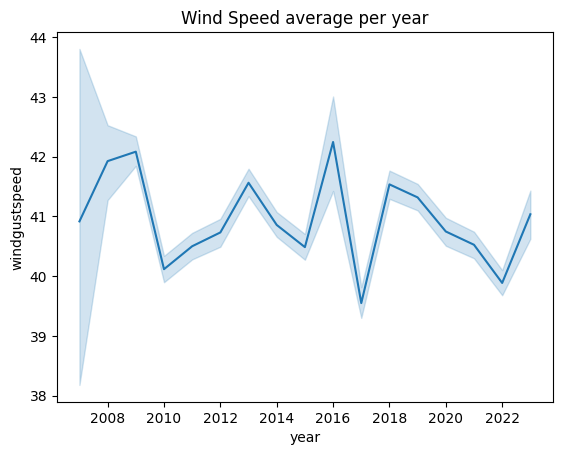

In [21]:
series = sns.lineplot(df , x='year', y='windgustspeed')
series.set_title('Wind Speed average per year')

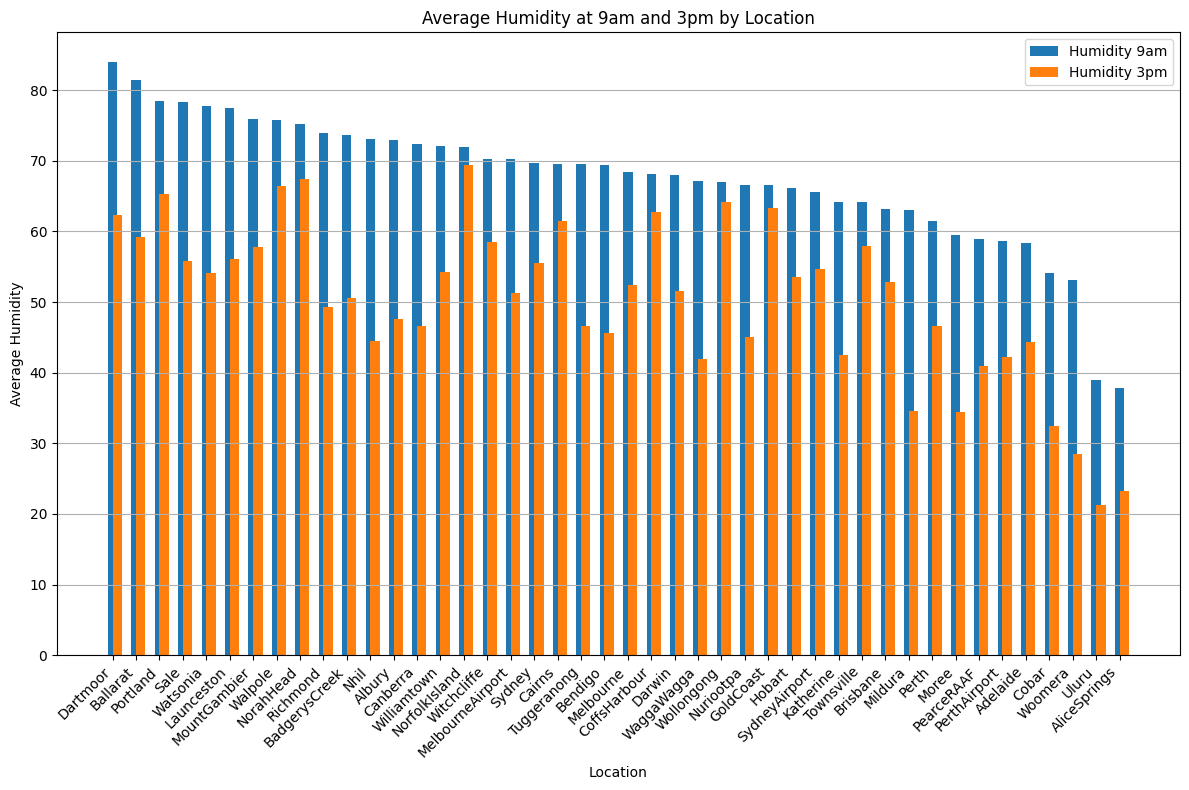

In [22]:
# avg of humidity in different times
humidity_avg = df.groupby('location')[['humidity9am' , 'humidity3pm']].mean()
humidity_avg = humidity_avg.sort_values(by='humidity9am' , ascending=False)
humidity_avg = humidity_avg.reset_index()

plt.figure(figsize=(12, 8))
bars9am = plt.bar(humidity_avg['location'], humidity_avg['humidity9am'], width=0.4, label='Humidity 9am', align='center')
bars3pm = plt.bar(humidity_avg['location'], humidity_avg['humidity3pm'], width=0.4, label='Humidity 3pm', align='edge')

plt.title('Average Humidity at 9am and 3pm by Location')
plt.xlabel('Location')
plt.ylabel('Average Humidity')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

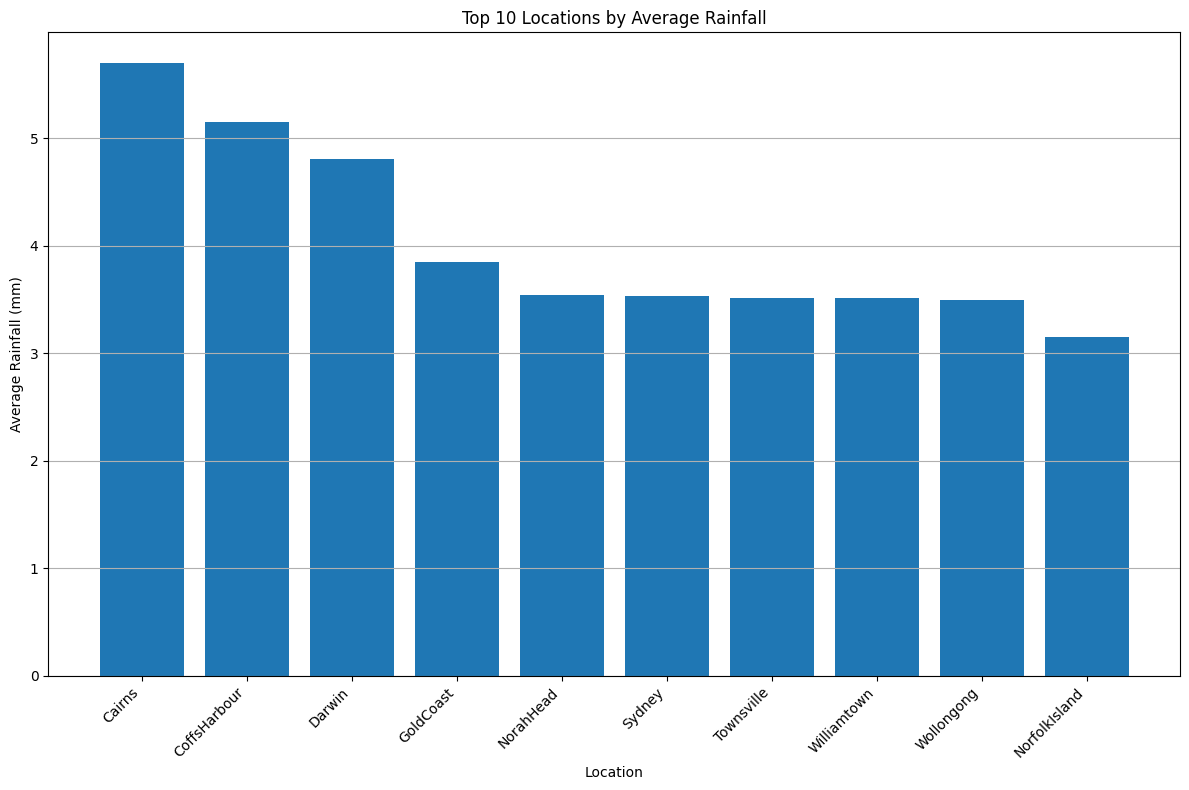

In [23]:
# avg rainfall for each location and sort by 'rainfall'
rainfall_avg = df.groupby('location', as_index=False)['rainfall'].mean()
rainfall_avg_sorted = rainfall_avg.sort_values(by='rainfall', ascending=False)

top_10_rainfall = rainfall_avg_sorted.head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_rainfall['location'], top_10_rainfall['rainfall'],)

plt.title('Top 10 Locations by Average Rainfall')
plt.xlabel('Location')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

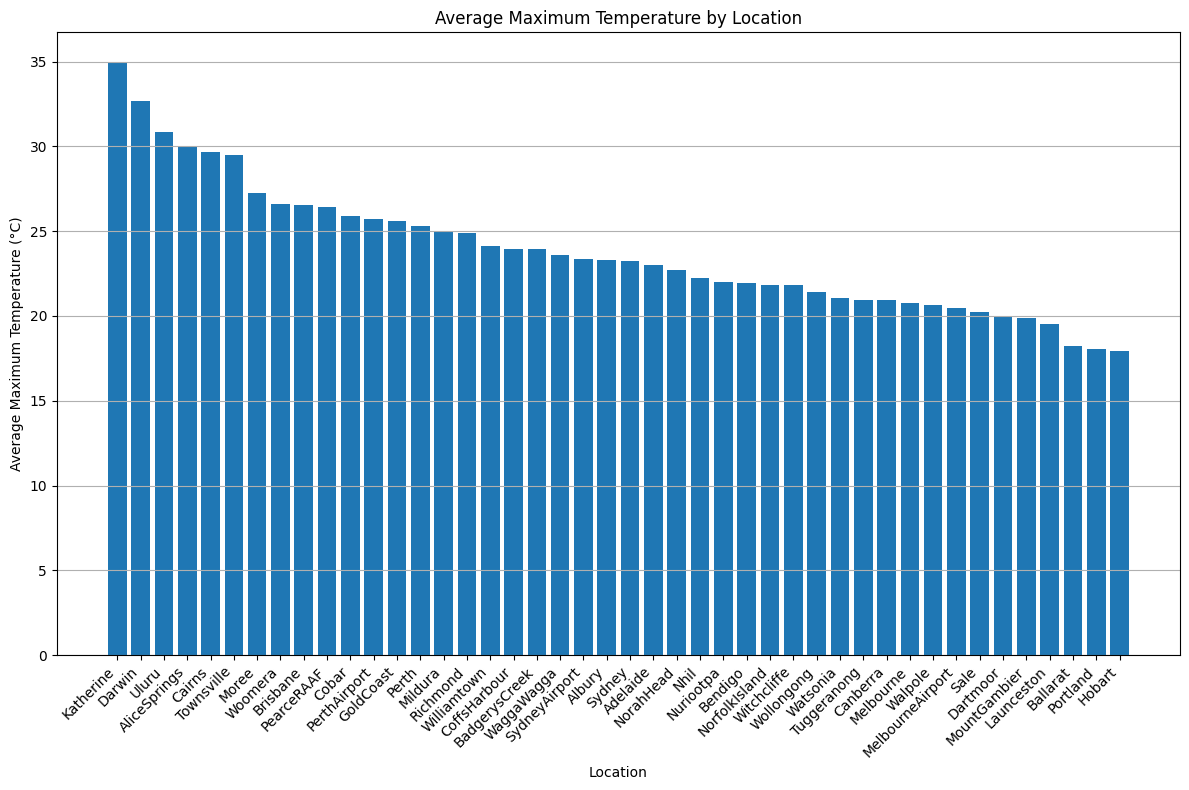

In [24]:
# avg max temperature for each location and sort by 'maxtemp'
max_temp = df.groupby('location', as_index=False)['maxtemp'].mean()
max_temp = max_temp.sort_values(by='maxtemp', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(max_temp['location'], max_temp['maxtemp'])
plt.title('Average Maximum Temperature by Location')
plt.xlabel('Location')
plt.ylabel('Average Maximum Temperature (°C)')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

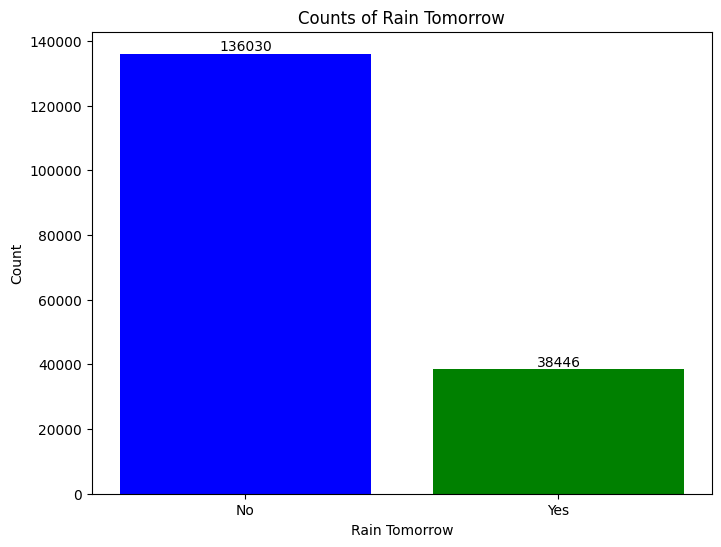

In [25]:
raintom = df.groupby('raintomorrow').size().reset_index(name='count')

plt.figure(figsize=(8, 6))
bars = plt.bar(raintom['raintomorrow'], raintom['count'], color=raintom['raintomorrow'].map({'No': 'blue', 'Yes': 'green'}))
plt.title('Counts of Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

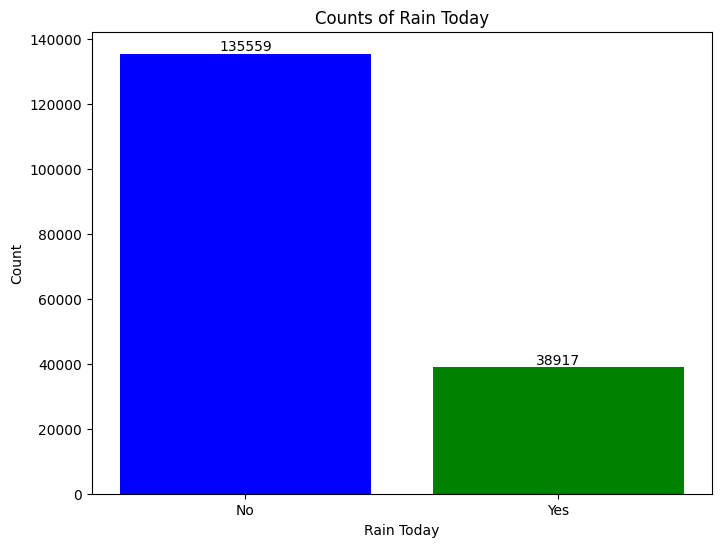

In [26]:
raintod = df.groupby('raintoday').size().reset_index(name='count')

plt.figure(figsize=(8, 6))
bars = plt.bar(raintod['raintoday'], raintod['count'], color=raintod['raintoday'].map({'No': 'blue', 'Yes': 'green'}))

plt.title('Counts of Rain Today')
plt.xlabel('Rain Today')
plt.ylabel('Count')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

## Pipeline


In [27]:
# features and target
X = df.drop(columns=['date', 'raintomorrow'])
y = df['raintomorrow']

# Print the class distribution before undersampling
print(y.value_counts())

Class distribution before undersampling:
raintomorrow
No     136030
Yes     38446
Name: count, dtype: int64


In [28]:
# Apply LabelEncoder
label_encoders = {}
for column in ['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [29]:
# To avoid data leakage, split dataset first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
# Define the numerical and categorical feature columns
numeric_features = ['mintemp', 'maxtemp', 'rainfall', 'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm', 'risk_mm', 'year', 'month', 'day']
categorical_features = ['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday']

In [31]:
# Define the numerical pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a passthrough transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('pass', 'passthrough')
])

# Combine the numerical and categorical pipelines
prep = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [32]:
# Define the NearMiss undersampler
undersampler = NearMiss()

# Apply undersampling on training data
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Print the class distribution after undersampling
print(pd.Series(y_train_res).value_counts())

Class distribution after undersampling:
raintomorrow
No     30757
Yes    30757
Name: count, dtype: int64


In [33]:
# Full pipeline with KNeighborsClassifier
knn_pipeline = Pipeline(steps=[
    ('prep', prep),
    ('classifier', KNeighborsClassifier())
])

# Full pipeline with RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('prep', prep),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the KNN pipeline on the undersampled training data
knn_pipeline.fit(X_train_res, y_train_res)

# Fit the RandomForest pipeline on the undersampled training data
rf_pipeline.fit(X_train_res, y_train_res)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mintemp', 'maxtemp',
                                                   'rainfall', 'windgustspeed',
                                                   'windspeed9am',
                                                   'windspeed3pm',
                                                   'humidity9am', 'humidity3pm',
                                                   'pressure9am', 'pressure3pm',
                                                   'temp9am', 'temp3pm',
                                                   'risk_mm', 'year', 'month',
                                                   'day']),
                                                 ('cat',
                                                  Pipeline(steps=[('pass',
                                                                   'passthrough')]),
                                                  ['location', 'windgustdir',
                                                   'winddir9am', 'winddir3pm',
                                                   'raintoday'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [34]:
# Evaluate KNN pipeline on training and testing data
print("\nKNeighborsClassifier Results:")
print("Training score:", knn_pipeline.score(X_train, y_train))
print("Testing score:", knn_pipeline.score(X_test, y_test))
y_pred_knn = knn_pipeline.predict(X_test)


KNeighborsClassifier Results:
Training score: 0.7683837225963606
Testing score: 0.739740944520862


In [35]:
# Calculate KNN metrics
KNN_Accuracy_Score = accuracy_score(y_test, y_pred_knn)
KNN_JaccardIndex = jaccard_score(y_test, y_pred_knn, pos_label='Yes')
KNN_F1_Score = f1_score(y_test, y_pred_knn, pos_label='Yes')

In [36]:
print(f"KNN Accuracy Score: {KNN_Accuracy_Score}")
print(f"KNN Jaccard Index: {KNN_JaccardIndex}")
print(f"KNN F1 Score: {KNN_F1_Score}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy Score: 0.739740944520862
KNN Jaccard Index: 0.3576632010750407
KNN F1 Score: 0.526880600125026
              precision    recall  f1-score   support

          No       0.89      0.76      0.82     27207
         Yes       0.44      0.66      0.53      7689

    accuracy                           0.74     34896
   macro avg       0.66      0.71      0.67     34896
weighted avg       0.79      0.74      0.76     34896



In [37]:
# Evaluate RandomForest pipeline on training and testing data
print("\nRandomForestClassifier Results:")
print("Training score:", rf_pipeline.score(X_train, y_train))
print("Testing score:", rf_pipeline.score(X_test, y_test))
y_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_rf))


RandomForestClassifier Results:
Training score: 1.0
Testing score: 1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     27207
         Yes       1.00      1.00      1.00      7689

    accuracy                           1.00     34896
   macro avg       1.00      1.00      1.00     34896
weighted avg       1.00      1.00      1.00     34896

